## Problem set 2

Luis Teles 2022

### Part 1

Do the folowing exercises from Week 1 lecture notebooks: 

- Numerical: Exercises 4-7

In addition, do the following exercises:

##### Economic setting

Demand function:

$ Q(p) = 0.5p^{-0.5}+ 0.3 p^{-0.2} $

Excess demand:

$ g(p) = 1 - 0.5p^{-0.5} - 0.3 p^{-0.2} $

Goal: for a given demanded quantity of $Q=1$, what is the price $p$ that clears the market?



In [2]:
#Imports and demand functions from previous exercises
from numpy import *
import matplotlib.pyplot as plt

def qd(p): return 0.5*(p**-0.5) + 0.3*(p**-0.2) 

def xd(p): return 1-qd(p)

def d_qd(p):  return -0.25*(p**-1.5) + -0.06*(p**-1.2) 

### Exercise 4

- First, define the derivative approximation function. This function takes three arguments: 1) a function, 2) $x_0$ and 3) precision $h= x-x_0$. The derivative approximation function is given by: $f'(x_0)= \frac{f(x_0+h)-f(x_0)}{h}$. Use $h=10^{-6}$.

- Define the Newton-Rhapson algorithm. Then use it to find the price $p$ that clears demand $Q=1$. Use tolerance $10^{-15}$ and use maximum number of iteratrions 1000 and initial guess $x_0=1$. 

In [8]:
def approx_deriv(x, f, h = 10**-6): return (f(x + h) - f(x)) / h

In [22]:
def root_NewtonRhapson(f, x0, tol = 10**-15, max_iter = 1000):
    x_n = x0
    n = 0
    gap = 1
    while (abs(gap) > tol) & (n <= max_iter):
        if n>0: x_n = x_n1
        x_n1 = x_n - f(x_n) / approx_deriv(x_n, f)
        gap = x_n1 - x_n
        n += 1
    if abs(gap) <= tol: 
        return x_n1
    else:
        print('error, did not converge')

In [23]:
root_NewtonRhapson(xd, x0 = 1)

0.5670944159657575

### Exercise 5

- Assume that the tax revenue for a government is given by $R(t)= -t^2+t$, where $t$ is the taxe rate. Use the grid search method and find the tax rate on the $[0,1]$ domain that maximizes the tax revenue up to $10^{-4}$. 

In [26]:
def revenue(t): return -t**2 + t

In [27]:
t_grid = arange(0, 1 + 10**-4, 10**-4)

revenue_space = [revenue(t) for t in t_grid]

print("The tax rate that maximizes tax revenue is", 100*max(revenue_space), "percent")

The tax rate that maximizes tax revenue is  25.0 percent


### Exercise 6

- Import scipy.optimize as opt and use the minimize method to find the optimal savings allocation. In addition, report the optimal consumption in both periods. Use initial guess $x_0=0.1$. (Hint: read the minimize documentation using help to check the arguments of this method)

In [37]:
import scipy.optimize as opt
#?opt.minimize

In [40]:
def total_utility(saving, mu, b, g, R, y):
    return ((y - saving) ** (1-mu))/(1-mu) + b * ((y + R * saving) ** (1-g))/(1-g)

In [41]:
mu_as = 1.1
b_as = 0.95
g_as = 1.2
R_as = 1.05
y_as = 10

In [42]:
optim_results = opt.minimize(lambda x: -total_utility(x, mu_as, b_as, g_as, R_as, y_as), x0 = 0.1)

optimal_saving = round(optim_results.x[0],2)

print("The optimal saving allocation is", optimal_saving)
print("This is", optimal_saving * 100 / 10, "percent of the income")

The optimal saving allocation is -0.98
This is -9.8 percent of the income


In [47]:
print("c1 =", y_as - optimal_saving)
print("c2 =", y_as + R_as * optimal_saving)
print("total cons", y_as - optimal_saving + y_as + R_as * optimal_saving)

c1 = 10.98
c2 = 8.971
total cons 19.951


### Exercise 7

- Build a function that returns an array with two elements, i.e. the residuals of the first order conditions for given $c_1, c_2$.

- Use the fsolve to get the optimal allocations, i.e. the ones that make the first order conditions zero.

### part 2

#### 1. Gaussian Log-Likelihood Estimation

In [80]:
import numpy as np

# Lets define the Gaussian Log-likelihood function
def lgauss(mu, sigma, n, x):
    '''
    This function evaluates the gaussian log-likelihood given mu, sigma,
    number of observations, n, and a dataset, x.
    
    Returns: a scalar
    '''
    
    l = -n/2*np.log(2*np.pi*sigma**2) -1/(2*sigma**2)*(sum((x-mu)**2))
    return l

In [79]:
# Next, lets import data on housing prices in Boston
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data[:,0]

A. Evaluate the log-likelihood with mu=5, sigma=1 and with Boston data.

B. Given sigma, find $\mu$ that maximizes lgauss by minimizing -lgauss. (use `fmin` from `scipy.optimize`)

C. Now use the Newton-Rhapson Method you defined in exercise 4 of the numerical lecture notebook.

D. Estimate both $\mu$ and $\sigma$.

E. Plot the 3D log-likelihood function. (you should see a preety flat surface with a tiny peak) 

#### 2. Function Approximation

Let's approximate the following function:

$$ f(x) = \min (\sin(x), 0.7) $$

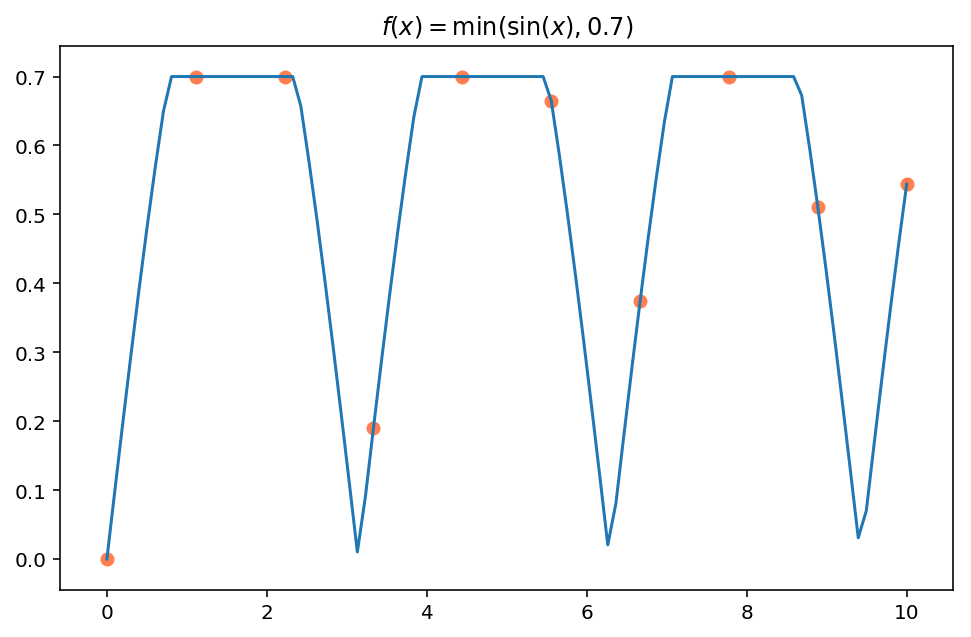

In [95]:
def fun(x):
    res = []
    for i in x:
        res.append(min(abs(np.sin(i)), 0.7))
    return res

x = np.linspace(0,10,100)
data_x = np.linspace(0,10,10) 

plt.figure(figsize=(8,5))
plt.plot(x, fun(x))
plt.scatter(data_x, fun(data_x), c = 'coral')
plt.title(r'$f(x) = \min (\sin(x), 0.7)$') # r before the title string calls latex
plt.show()

A. Compute the linear interpolation approximation of the function and plot it.

B. Repeat with a cubic spline and with the Chebyshev polynomials (use 6). 

C. Define the approximation error.

D. Plot the approximation error for all three types of approximations in the same figure to compare them.

E. Which approximation delivers the lowest approximation error?